In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("Invistico_Airline.csv")
df.shape

(129880, 22)

In [2]:
df

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,...,2,3,3,2,3,2,1,2,193,205.0


In [8]:
# Dropping rows with null values
df.dropna(inplace=True)
df.shape

(129487, 22)

In [14]:
# Converting categorical to numerical features
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Taking all categorical or object columms
categorical_columns = df.select_dtypes(include=['object', 'category'])

# Through loop encode each categorical feautre
for column in categorical_columns:

  df[column]= label_encoder.fit_transform(df[column])

# Print the DataFrame with the encoded column
df

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,65,1,1,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1,0,47,1,0,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,1,0,15,1,1,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,1,0,60,1,1,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,1,0,70,1,1,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,1,29,1,1,1731,5,5,5,3,...,2,2,3,3,4,4,4,2,0,0.0
129876,0,1,63,1,0,2087,2,3,2,4,...,1,3,2,3,3,1,2,1,174,172.0
129877,0,1,69,1,1,2320,3,0,3,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,0,1,66,1,1,2450,3,2,3,2,...,2,3,3,2,3,2,1,2,193,205.0


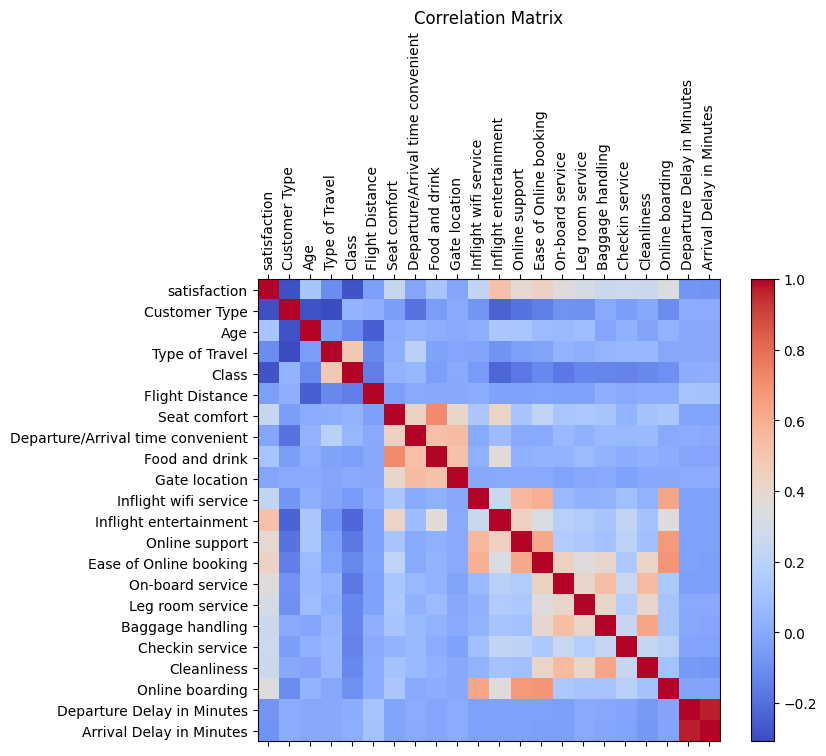

In [15]:
import matplotlib.pyplot as plt


# Creat correlation matrix

correlation_matrix = df.corr()

# Create a figure and axis for the correlation matrix plot
fig, ax = plt.subplots(figsize=(8, 6))

# Create a heatmap of the correlation matrix
cax = ax.matshow(correlation_matrix, cmap='coolwarm')

# Add a colorbar to the heatmap
fig.colorbar(cax)

# Set the axis labels and the title
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')

# Display the correlation matrix
plt.show()


In [19]:
# Make correlation with satisfaction
correlation_with_target = df.corr()["satisfaction"]

columns_to_drop = correlation_with_target[correlation_with_target < 0.25].index

df = df.drop(columns=columns_to_drop)

df

,satisfaction,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
0,1,4,2,3,3,0,3,5,3,2
1,1,2,2,3,4,4,4,2,3,2
2,1,0,2,2,3,3,4,4,4,2
3,1,4,3,1,1,0,1,4,1,3
4,1,3,4,2,2,0,2,4,2,5
...,...,...,...,...,...,...,...,...,...,...
129875,1,5,2,2,3,3,4,4,4,2
129876,0,1,1,3,2,3,3,1,2,1
129877,0,2,2,4,4,3,4,2,3,2
129878,0,2,2,3,3,2,3,2,1,2


In [42]:


def sigmoid(x):

  return 1 / (1 + np.exp(-x))

class LogisticRegressionOwn():

  def __init__(self, lr=0.01, epochs=100):
    self.lr = lr
    self.epochs = epochs
    self.weights = None
    self.bias = None

  def fit(self, X, y):
      n_samples, n_features = X.shape
      self.weights = np.zeros(n_features)
      self.bias = 0

      for i in range(self.epochs):
        linear_predictions = np.dot(X, self.weights) + self.bias
        predictions = sigmoid(linear_predictions)

        dw = (1/n_samples) * np.dot(X.T, (predictions - 1))
        db = (1/n_samples) * np.sum(predictions - y)

        self.weights = self.weights - self.lr * dw
        self.bias = self.bias - self.lr * db

  def predict(self, X):
        linear_predictions = np.dot(X, self.weights) + self.bias
        predictions = sigmoid(linear_predictions)
        class_pred = [0 if y < 0.5 else 1 for y in y_pred]
        return class_pred


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = df.drop(columns="satisfaction")
y = df["satisfaction"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 69)

# Own model
model_own = LogisticRegressionOwn()
model_own.fit(X_train, y_train)

y_pred_own = model.predict(X_test)


# sklearn model
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy of sklearn:", accuracy_score(y_test, y_pred))
print("Accuracy of code from scratch", accuracy_score(y_test, y_pred_own))


Accuracy of sklearn: 0.8014518495636729
Accuracy of code from scratch 0.8014518495636729
